In [22]:
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

In [23]:



csv = pd.read_csv("effects_and_weights.csv")
m_r = np.array(csv["m.rewards"])
r_sorted = np.argsort(m_r)
trials = np.arange(1, 101)
#excluded = np.array([1, 2, 11, 12, 50])
#trials = np.delete(trials, excluded)

def plot_fitted_curves():
#    avg_mat = pd.read_csv("tBt_euc_w.csv").values
    avg_mat = pd.read_csv("log_curves_weights.csv").values
    T = np.arange(len(avg_mat[0, :]))
    T = np.linspace(0, 100, len(avg_mat[0, :]))
#    f, ax = plt.subplots(1, 1)
    colors = plt.cm.jet(np.linspace(0,1,len(r_sorted)))

    #plt.title("Fitted logistic functions")
    #plt.ylabel("Weight Euclidean")
    #plt.xlabel("Trials %")
    n = avg_mat.shape[1]
    m =avg_mat.shape[0]
    N = n*m
    long_df = pd.DataFrame()
    long_df["w"] = np.zeros(N)
#    long_df["rank"] = np.zeros(N)
    long_df["id"] = np.zeros(N)
    long_df["T"] = np.zeros(N)
    long_df["c"] = np.zeros(N)

    print(N, len(trials))
#    return 0
    for i, idx in enumerate(r_sorted):
        long_df["w"][((i)*n):((i+1)*n)] = avg_mat[idx, :]
         
 #       long_df["rank"][((i)*n):((i+1)*n)] = idx

        long_df["id"][((i)*n):((i+1)*n)] = i
        long_df["T"][((i)*n):((i+1)*n)] = trials

    norm = matplotlib.colors.Normalize(vmin=0, vmax=100) 
    sm = plt.cm.ScalarMappable(cmap="Spectral_r", norm=norm)
    sm.set_array([])
    ax = sns.lineplot(data=long_df, x="T", y="w", hue="id", palette=plt.cm.Spectral_r)
    

    ax.set_xlabel("Trial", fontsize=18)
    ax.set_ylabel("Weight", fontsize=18)
    ax.set_xticks([0,25, 50,75,  100])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    # Turns off grid on the left Axis.
    ax.grid(False)

    # Turns off grid on the secondary (right) Axis.
    #ax.right_ax.grid(False)
    ax.tick_params(labelsize=14)
    sns.set(font_scale=1.26)
    ax.figure.colorbar(sm, ticks=[0, 25, 50, 75, 100], label="Performance percentile", aspect=12)

    plt.legend([], [], frameon=False)

    plt.tight_layout()
    plt.savefig("figures/september/log_curves.eps")
    plt.show()



4800 100


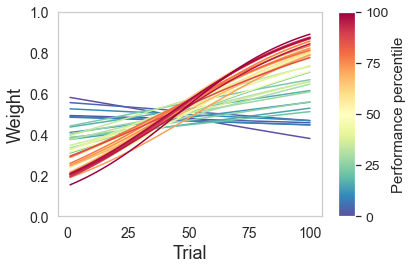

In [24]:
         
plot_fitted_curves()
